# Prevendo valores de seguro

- Nosso conjunto de dados simples contém alguns atributos para cada pessoa, como
- Idade, sexo, IMC, crianças, fumante, região e seus encargos

## Objetivo
- Para usar essas informações para prever cobranças para novos clientes

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Algumas informações

In [3]:
 insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


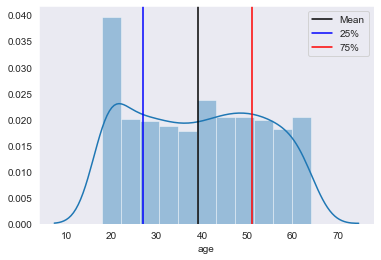

In [19]:
sns.set_style("dark")
ax = sns.distplot(insurance.age)
plt.axvline(insurance.age.mean(), color = 'Black', label = 'Mean')
plt.axvline(insurance.age.quantile(.25), color = 'Blue', label = '25%')
plt.axvline(insurance.age.quantile(.75), color = 'Red', label = '75%')
plt.legend()
plt.show()

In [20]:
print ("Colunas  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nValores ausentes :  ", insurance.isnull().sum().values.sum())
print ("\nValores únicos :  \n",insurance.nunique())

Colunas  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Valores ausentes :   0

Valores únicos :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


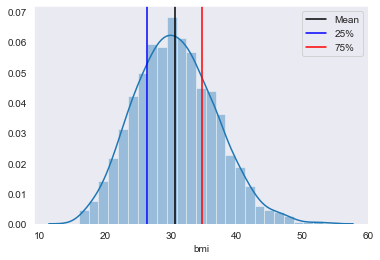

In [21]:
sns.set_style("dark")
ax = sns.distplot(insurance.bmi)
plt.axvline(insurance.bmi.mean(), color = 'Black', label = 'Mean')
plt.axvline(insurance.bmi.quantile(.25), color = 'Blue', label = '25%')
plt.axvline(insurance.bmi.quantile(.75), color = 'Red', label = '75%')
plt.legend()
plt.show()

No histograma acima é possível perceber que os dados de IMC formam perfeitamente uma curva normal


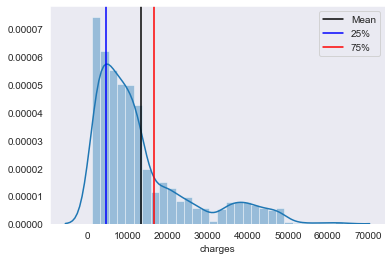

In [22]:
sns.set_style("dark")
ax = sns.distplot(insurance.charges)
plt.axvline(insurance.charges.mean(), color = 'Black', label = 'Mean')
plt.axvline(insurance.charges.quantile(.25), color = 'Blue', label = '25%')
plt.axvline(insurance.charges.quantile(.75), color = 'Red', label = '75%')
plt.legend()
plt.show()

Já o histograma de cobranças apresenta a forma de Right Skew
***
Agora vamos criar uma matriz de correlação.

In [23]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No handles with labels found to put in legend.


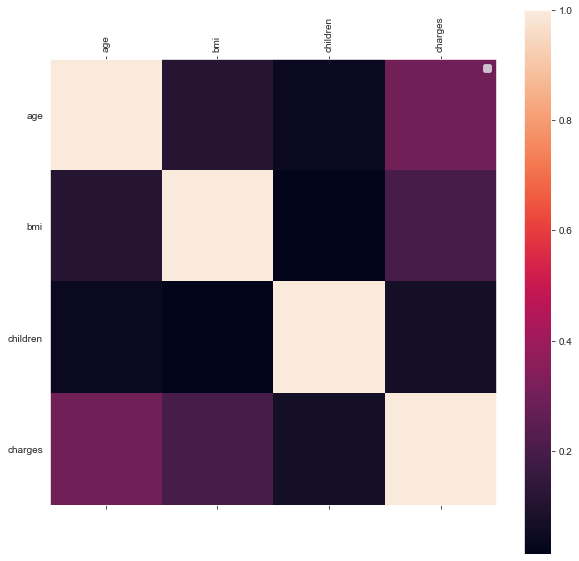

In [24]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(insurance)

Analisando a matriz de correlação fica  claro que a Feature que mais influencia o valor das cobranças é a idade 

 ***
Agora iremos plotar os histogramas de uma outra maneira:

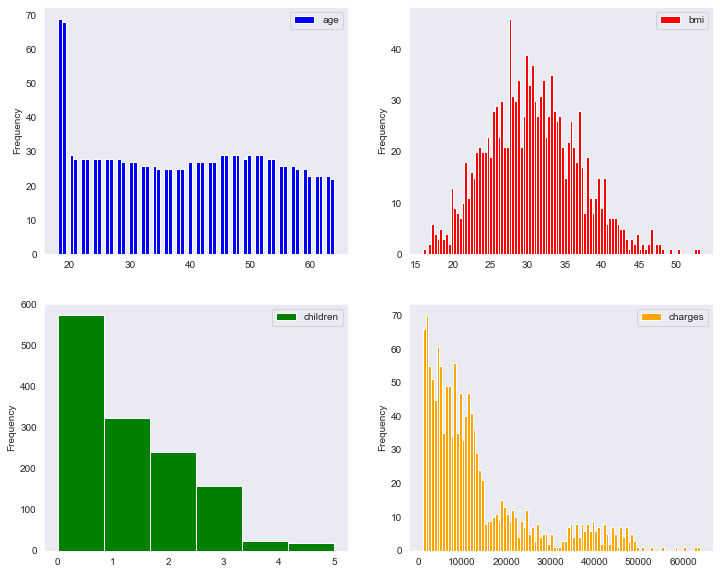

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])
plt.show()

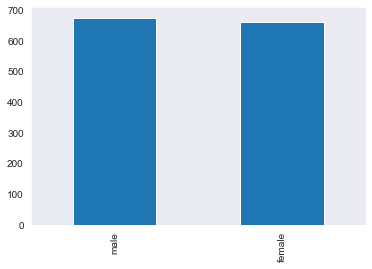

In [26]:
insurance['sex'].value_counts().plot(kind='bar')

Quantidade de homens e mulheres no dataset

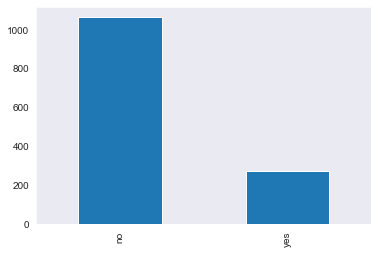

In [27]:
insurance.smoker.value_counts().plot(kind='bar')

Representação de não fumantes e fumantes do dataset.

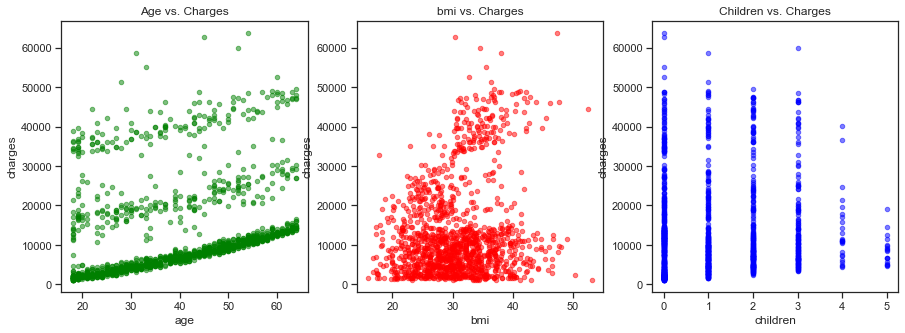

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
insurance.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="bmi vs. Charges")
insurance.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

No scattler plot de "Age vc Charges" é visto claramente que existem três linhas de tendência, uma acima da outra. Essas três linhas de tendência apresentam uma taxa de variação igual, porém alguma outra Feature provavelmente eestá influenciando nos níveis de preço.<br>
Vamos investigar:

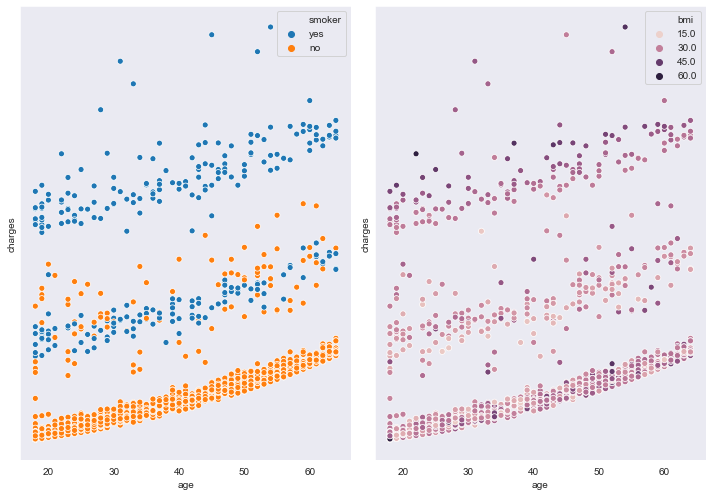

In [56]:
f, axes = plt.subplots(1, 2, figsize=(10, 7))
sns.scatterplot(x="age",y="charges",hue="smoker" ,data=insurance, ax=axes[0])
sns.scatterplot(x="age",y="charges",hue="bmi" ,data=insurance, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

Com o primeiro plot fica bem claro que ser fumante é uma Feature marcante que aumenta o preço do seguro e o próximo palpite é que o IMC seja a outra Feature que faz os preços crescerem mais ainda.

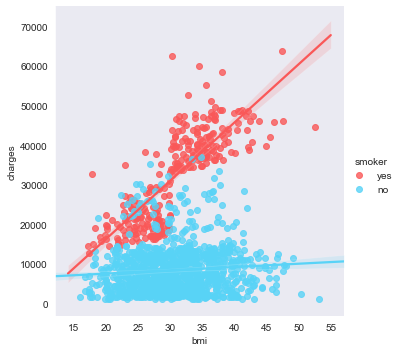

In [60]:
pal = ["#FA5858", "#58D3F7"]
sns.lmplot(x="bmi", y="charges", data=insurance, palette=pal, hue='smoker')
plt.show()

O Scattler plot acima confirma nossa suposição que o IMC era de fato a outra Feature que influencia nos preços.

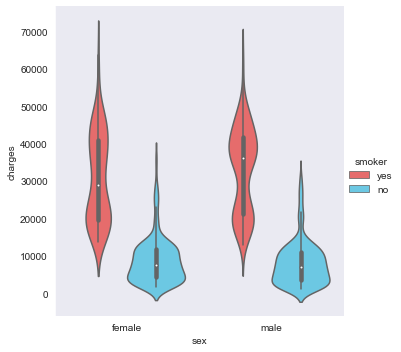

In [63]:
pal = ["#FA5858", "#58D3F7"]
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance, palette = pal)
plt.show()

O perfil de comportamento dos preços é bastante semelhante entre o sexo masculino e feminino quando comparamos quem é fumante ou não. Os fumantes tendem a pagar mais no seguro.


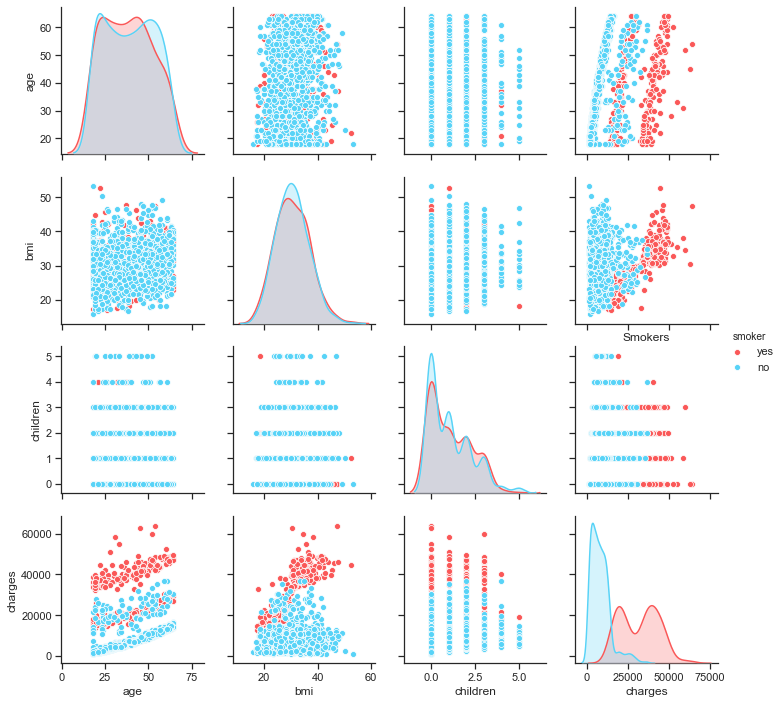

In [65]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")
plt.show()

Acima plotamos um Pairplot pra ter uma noção geral das relações entre as Features.
***
### Preparando Machine Learning Model

In [70]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

A Feature 'region' pode até ter um pouco de impacto no modelo, porém vamos retira-la por enquanto.

In [72]:
insurance.drop(["region"], axis=1, inplace=True) 
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


Agora vamos transformar os dados categóricos, deixando-os na forma binária. 

In [73]:
insurance['sex'] = insurance['sex'].map(lambda x: 1 if x == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda x: 1 if x == 'yes' else 0)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


Separando 'X' e 'Y' do modelo

In [74]:
X = insurance.drop(['charges'], axis = 1)
y = insurance.charges

### Modelando nossos dados
***
Linear Regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952171980481992


**Score** é a pontuação R2, que varia entre 0 e 100%. Está intimamente relacionado ao MSE, mas não é o mesmo.

A Wikipedia define r2 assim: "... é a proporção da variação na variável dependente que é previsível a partir da (s) variável (s) independente (s)". Outra definição é "(variação total explicada pelo modelo) / variação total". Portanto, se é 100%, as duas variáveis estão perfeitamente correlacionadas, ou seja, sem nenhuma variação. Um valor baixo mostraria um baixo nível de correlação, significando um modelo de regressão que não é válido, mas não em todos os casos.
***
Abaixo são printados os valores atuais e os valores previstos pela Regressão Linear

In [81]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results.head(10)

,Actual,Predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
981,4500.33925,3715.158091
31,2198.18985,1226.517979
1256,11436.73815,14013.625319
1219,7537.16390,8801.377937
1320,5425.02335,7319.356930


#### Agora vamos normalizar nossos dados para verificar se obtemos resultados melhores.

In [79]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,0.985155,-1.362635,-0.892144,-0.503736


#### Abaixo iremos criar uma Regressão linear multipla e outra Regressão linear polinomial.

In [82]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [83]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

#### Também iremos treinar uma Árvore de decisão regressora e uma Random Florest.

In [85]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=13, splitter='best')

In [86]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

**NOTA:**
**n_estimators** representa o número de árvores na floresta. Geralmente, quanto maior o número de árvores, melhor é aprender os dados. No entanto, adicionar muitas árvores pode atrasar consideravelmente o processo de treinamento; portanto, fazemos uma pesquisa de parâmetros para encontrar o ponto ideal.

In [87]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

### Avaliando Regressão linear multipla

In [95]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR) 

Training Accuracy for Multiple Linear Regression Model:  -0.48956074576438935
Testing Accuracy for Multiple Linear Regression Model:  -0.3241102081110292
RMSE for Training Data:  14589.307283298092
RMSE for Testing Data:  14438.16627882823
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.717113419200113


### Avaliando Regressão Polinnomia

In [90]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8352122533530899
Testing Accuracy for Polynomial Regression Model:  0.8801183077513688
RMSE for Training Data:  4852.52766131438
RMSE for Testing Data:  4344.365985006613
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391072917684934


### Avaliando Árvore de decisão Regressora

In [91]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8694256791947466
Testing Accuracy for Decision Tree Regression Model:  0.8711939682763064
RMSE for Training Data:  4319.5096631798915
RMSE for Testing Data:  4503.167201972113
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494241031595924


### Avaliando Random Florest Regression

In [92]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8786362276689045
Testing Accuracy for Random Forest Regression Model:  0.8969134302201285
RMSE for Training Data:  4164.37754192943
RMSE for Testing Data:  4028.5709486806763
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573836617506323


### Avaliando Suport Vector Regression

In [93]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6522181188487904
Testing Accuracy for Support Vector Regression Model:  0.7343173561601566
RMSE for Training Data:  7049.511742429625
RMSE for Testing Data:  6467.427432129319
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7058131213464467


Comparando todos resultados

In [96]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.489561,-0.324110,14589.307283,14438.166279,0.717113
Polynomial Regression,fit_intercept=False,0.835212,0.880118,4852.527661,4344.365985,0.839107
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509663,4503.167202,0.849424
Random Forest Regression,"n_estimators=400, max_depth=5",0.878636,0.896913,4164.377542,4028.570949,0.857384
Support Vector Regression,"kernel=”linear”, C=1000",0.652218,0.734317,7049.511742,6467.427432,0.705813


Nosso melhor modelo foi o Random Florest usando 400 estimadores(ávores), com a profundidade máxima de 5.
***
#### Vamos testar nosso modelo regressor passando por ele novos dados

In [97]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [99]:
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [100]:
input_data = sc.transform(input_data)
input_data

array([[ 3.50000000e+01,  4.25050490e-17,  2.60000000e+01,
         9.74074040e-17, -7.79259232e-17]])

In [101]:
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[ 3.50000000e+01,  4.25050490e-17,  2.60000000e+01,
         9.74074040e-17, -7.79259232e-17]])

Prevendo o valor para a nova entrada:

In [102]:
random_forest_reg.predict(input_data)

array([17742.55241453])